[[-0.05560009  0.07915738  0.01286852 ..., -0.02362681  0.0124323
  -0.01650292]
 [-0.05612385  0.07773136  0.00963016 ...,  0.0155038  -0.00965324
   0.00715314]
 [-0.0554723   0.08023586  0.00815516 ..., -0.02736051  0.01087916
  -0.00663532]
 ..., 
 [-0.04584537 -0.00863257  0.01379517 ...,  0.05202636  0.03458231
   0.01316781]
 [-0.04566563 -0.00669973  0.01411187 ...,  0.01092346 -0.00984692
   0.02280806]
 [-0.0450619  -0.00480673  0.01675974 ..., -0.03579307  0.02200716
   0.00336024]]
[  9.35880241e+04   1.40218082e+04   1.03513979e+04   7.58749370e+03
   6.46783337e+03   5.04535210e+03   4.94045820e+03   4.66769795e+03
   4.51521725e+03   4.19037077e+03   4.10939299e+03   3.70302368e+03
   3.42961059e+03   3.26597290e+03   3.19267880e+03   3.05821288e+03
   2.99728043e+03   2.79039310e+03   2.74588187e+03   2.59543184e+03
   2.55207824e+03   2.49032611e+03   2.35964714e+03   2.29023660e+03
   2.27369072e+03   2.20841375e+03   2.18361128e+03   2.09943259e+03
   2.08471838e+03 

(682, 1024, 3)


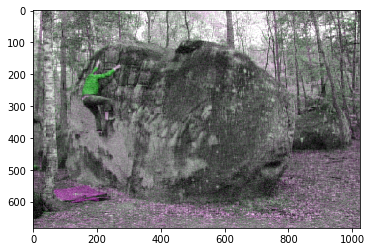

In [131]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as la

filename = 'Boulder_image.jpg'
percent = 0.1

##the SVD Function

def svdimage(filename,percent):
    image = plt.imread(filename)   
    image_r = image[:,:,0]
    image_g = image[:,:,1]
    image_b = image[:,:,2]


    Ur,sigma_r,VTr = la.svd(image_r)
    Ug,sigma_g,VTg = la.svd(image_g)
    Ub,sigma_b,VTb = la.svd(image_r)
    print(Ur)
    
    print(sigma_g)

    R=np.zeros(image_r.shape)
    G=np.zeros(image_g.shape)
    B=np.zeros(image_b.shape)


    for i in range(int(percent*len(sigma_r))+1):
        R += sigma_r[i]*np.dot(Ur[:,i].reshape(-1,1),VTr[i,:].reshape(1,-1))
    for i in range(int(percent*len(sigma_g))+1):
        G += sigma_g[i]*np.dot(Ug[:,i].reshape(-1,1),VTg[i,:].reshape(1,-1))
    for i in range(int(percent*len(sigma_b))+1):
        B += sigma_b[i]*np.dot(Ub[:,i].reshape(-1,1),VTb[i,:].reshape(1,-1))
    
    final=np.stack((R,G,B),2)
    final[final>255]=255
    final[final<0]=0
    final=np.rint(final).astype('uint8')
    return final


Comp = svdimage(filename,percent)
print(Comp.shape)
plt.imshow(Comp)




    




[  8.69011486e+04  -3.88910293e+03  -3.80246907e+03  -3.75315833e+03
  -3.69950689e+03  -3.67857949e+03  -3.63729033e+03  -3.59552866e+03
  -3.55578931e+03  -3.55198365e+03  -3.52318894e+03  -3.51784245e+03
  -3.49508311e+03  -3.48268967e+03  -3.45227498e+03  -3.43365778e+03
  -3.41194049e+03  -3.41303163e+03  -3.39866002e+03  -3.38136353e+03
  -3.36584896e+03  -3.34492602e+03  -3.31641509e+03  -3.30158395e+03
  -3.27600398e+03  -3.27073203e+03  -3.22016485e+03  -3.21624221e+03
   3.85140354e+03   3.81454179e+03   3.74902200e+03   3.69635972e+03
   3.66979728e+03   3.62798707e+03   3.60781244e+03   3.59245795e+03
   3.57137565e+03   3.53292544e+03   3.52604031e+03   3.50255868e+03
   3.47573863e+03   3.45658111e+03   3.42930634e+03   3.41146978e+03
   3.39340202e+03   3.38569351e+03   3.37363959e+03   3.21929335e+03
   3.34849143e+03   3.33207790e+03   3.25677302e+03   3.27676139e+03
   3.31144883e+03   3.29798659e+03   3.29613182e+03   3.21294807e+03
   3.20056467e+03  -3.19680447e+03

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in sqrt
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in sqrt


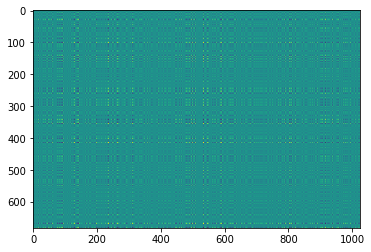

In [129]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as la
from numpy.linalg import eig
filename = 'Boulder_image.jpg'

image = plt.imread(filename)   
image_r = image[:,:,0]
image_g = image[:,:,1]
image_b = image[:,:,2]


W = np.dot(image_r,image_r.transpose())
Wv = np.dot(image_r.transpose(),image_r)
print(image_r)

W_eigenvalues, U = eig(W)
Wv_eigenvalues, V = eig(Wv)

print(W_eigenvalues)

S_entries = np.sqrt(W_eigenvalues)
print(S_entries)
S_entries_sorted = np.flip(np.sort(S_entries),axis=0)
print(S_entries_sorted)
sorting_indices_S = np.flip(np.argsort(S_entries), axis=0)

U_sorted = U[sorting_indices_S]

sorting_indices_V = np.flip(np.argsort(np.sqrt(Wv_eigenvalues)),axis=0)
V_sorted = V[sorting_indices_V]


selection = range(20)
for i in selection:
    U_tmp = np.reshape(U_sorted[:,i],(len(U_sorted[0,:]),1))
    V_tmp = np.reshape(V_sorted[:,i],(len(V_sorted[0,:]),1))
    SVD_temp = np.dot(U_tmp, V_tmp.transpose())
    SVD = +SVD_temp*sorting_indices_S[i]    
SVD = np.real(SVD)

resulting_image = SVD
plt.imshow(resulting_image)
print(resulting_image)


In [134]:
import matplotlib.pyplot as plt
import math
import numpy as np
from numpy import linalg as la
from numpy.linalg import eig
filename = 'Boulder_image.jpg'

image = plt.imread(filename)   
image_r = image[:,:,0]
image_g = image[:,:,1]
image_b = image[:,:,2]


W = np.dot(image_r,image_r.transpose())
Wv = np.dot(image_r.transpose(),image_r)
#print(image_r)

W_eigenvalues, U = eig(W)
Wv_eigenvalues, V = eig(Wv)

W_eigenvalues_NZ = np.maximum(W_eigenvalues, 0)
Wv_eigenvalues_NZ = np.maximum(Wv_eigenvalues, 0)

#print(W_eigenvalues_NZ)

S_entries = np.sqrt(W_eigenvalues_NZ)
S_pri_entries = np.sqrt(Wv_eigenvalues_NZ)
#print(S_entries)
S_entries_sorted = np.flip(np.sort(S_entries),axis=0)
#print(S_entries_sorted)
sorting_indices_S = np.flip(np.argsort(S_entries), axis=0)
#sorting_indices_S = np.argsort(-S_entries)
#print(sorting_indices_S)
U_sorted = U[sorting_indices_S]
#print(U_sorted)

sorting_indices_V = np.flip(np.argsort(S_pri_entries),axis=0)
#sorting_indices_V = np.argsort(-np.sqrt(Wv_eigenvalues_NZ))
#print(sorting_indices_V)
V_sorted = V[sorting_indices_V]
#print(V_sorted)

S = np.zeros_like(A)
np.fill_diagonal(S,S_entries_sorted)

print(S.shape)
#.reshape(-1,1)

#print(S.shape)
VD_tmp = np.dot(U_sorted.transpose(), S)
SVD = np.dot(SVD_tmp,V_sorted.transpose())
SVD = np.real(SVD)
SVD = SVD/np.max(SVD)


resulting_image = SVD
plt.figure(1)
plt.imshow(image_r)
plt.figure(2)
plt.imshow(resulting_image)
#print(resulting_image)


(3, 3)


ValueError: shapes (682,682) and (3,3) not aligned: 682 (dim 1) != 3 (dim 0)